In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from numba import njit, prange
import torch
from graph_optimization import (fastest_averaging_constant_weight,
                                fdla_weights_symmetric, fmmc_weights,
                                lmsc_weights, max_degree_weights,
                                metropolis_hastings_weights)

Total Variation Distance (TVD): 0.3450


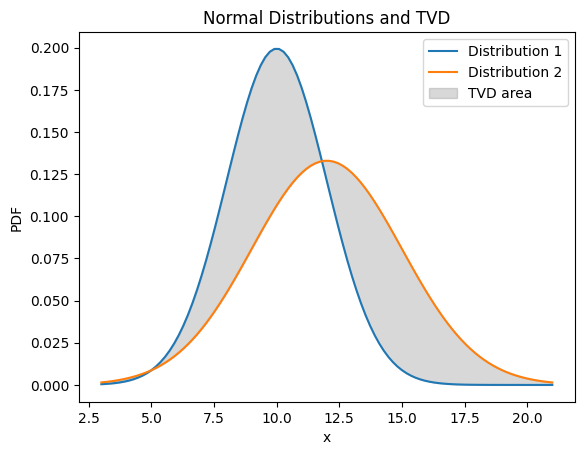

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for the two normal distributions
mu1, sigma1 = 10, 2
mu2, sigma2 = 12, 3

# Create an array of x values
x = np.linspace(min(mu1 - 3 * sigma1, mu2 - 3 * sigma2), max(mu1 + 3 * sigma1, mu2 + 3 * sigma2), 100)

# Calculate the PDFs for both distributions
pdf1 = stats.norm.pdf(x, mu1, sigma1)
pdf2 = stats.norm.pdf(x, mu2, sigma2)

# Calculate the TVD
tvd = 0.5 * np.trapz(np.abs(pdf1 - pdf2), x)

print(f"Total Variation Distance (TVD): {tvd:.4f}")

# Plot the PDFs
plt.plot(x, pdf1, label="Distribution 1")
plt.plot(x, pdf2, label="Distribution 2")
plt.fill_between(x, pdf1, pdf2, color="gray", alpha=0.3, label="TVD area")
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Normal Distributions and TVD")
plt.legend()
plt.show()